In [1]:
import numpy as np
from math import exp, sqrt
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Scoring Function
def score(TrainData,TestData,L):
    
    print("Scoring the data")
    scored_trainData = np.zeros((1,L))
    scored_testData = np.zeros((1,L))
    
    #Parameters
    a1 = 3.2
    a2 = 10
    u = np.sum(TrainData)
    u = u/L
    delta = np.square((np.absolute(TrainData) - u))
    delta = np.sum(delta)/L
    delta = sqrt(delta)
    M = max(np.max(TrainData), np.max(TestData))
    
    
    for i in range(L):
        scored_trainData[0,i] = 1 + exp((TrainData[0,i]/(u+3*delta))-a1)
        scored_testData[0,i] = scored_trainData[0,i] + ((TestData[0,i]-TrainData[0,i])/(a1*(u+3*delta)))
        
    scored_trainData = np.power(scored_trainData,-1)
    scored_testData = np.power(scored_testData,-1)
    
    return scored_trainData,scored_testData    

In [3]:
#Loading Data files
L = 90
Train_Data = np.loadtxt("Data/DTW_bw_rbf_correct.csv", delimiter = ',').reshape((1,L))
Test_Data = np.loadtxt("Data/DTW_bw_rbf_incorrect.csv", delimiter = ',').reshape((1,L))


No handles with labels found to put in legend.


Scoring the data


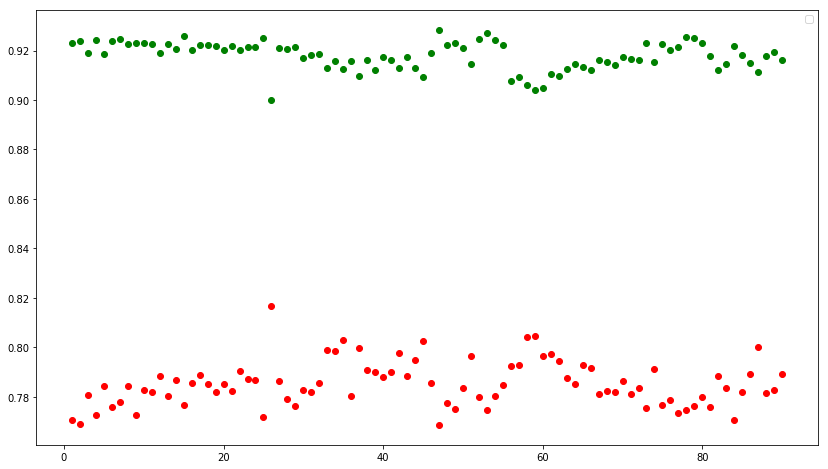

In [4]:
#scores
scored_train, scored_test = score(Train_Data, Test_Data, L)
samples = np.arange(1,L+1).reshape(1,L)
#Plotting 
plt.figure(figsize = (14,8))
plt.plot(samples,scored_train,"go")
plt.plot(samples,scored_test,"ro")
plt.legend()
plt.show()

In [5]:
#Saving the data
os.chdir("Data")
np.savetxt("Score_Train.csv", scored_train,delimiter=',')
np.savetxt("Score_Test.csv", scored_test,delimiter=',')
